# **Import Data**

In [1]:
import pandas as pd # Untuk membaca file csv yang akan kita gunakan

In [2]:
# Pertama, Import data yang akan digunakan
url = 'https://raw.githubusercontent.com/Iqbalpr/Dummy-Regression/main/Salaries.csv'
Salaries = pd.read_csv(url)
Salaries.index = Salaries.index + 1 # Memulai index dari angka 1
Salaries

,id,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,1,Prof,B,19,18,Male,139750
2,2,Prof,B,20,16,Male,173200
3,3,AsstProf,B,4,3,Male,79750
4,4,Prof,B,45,39,Male,115000
5,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
393,393,Prof,A,33,30,Male,103106
394,394,Prof,A,31,19,Male,150564
395,395,Prof,A,42,25,Male,101738
396,396,Prof,A,25,15,Male,95329


In [3]:
Salaries.shape

(397, 7)

Dapat dilihat bahwa data memiliki 7 kolom dan 397 baris (data observasi)

# **Merapihkan Data**

In [4]:
# Kedua, Kita hapus kolom yang tidak digunakan (id, discipline, yrs.since.phd)
Columns = ['id', 'discipline', 'yrs.since.phd']
Salaries.drop(Columns,inplace=True, axis=1)
Salaries

,rank,yrs.service,sex,salary
1,Prof,18,Male,139750
2,Prof,16,Male,173200
3,AsstProf,3,Male,79750
4,Prof,39,Male,115000
5,Prof,41,Male,141500
...,...,...,...,...
393,Prof,30,Male,103106
394,Prof,19,Male,150564
395,Prof,25,Male,101738
396,Prof,15,Male,95329


In [5]:
Salaries.shape

(397, 4)

Dapat dilihat bahwa kolom berubah menjadi 4, yang menandakan bahwa kolom (id, discipline, yrs.since.phd) sudah berhasil terhapus

In [6]:
# Ketiga, kita mengambil data random sebanyak 200 observasi
import random
from random import sample
import numpy as np

np.random.seed(24) # agar hasil data acak yang digunakan tidak berbeda selama proses pengujian
Salaries2 = Salaries.take(np.random.permutation(len(Salaries))[:200])
Salaries2

,rank,yrs.service,sex,salary
256,AssocProf,8,Male,83000
319,Prof,16,Male,134550
359,Prof,14,Female,109954
77,Prof,3,Male,150480
189,AssocProf,28,Male,106300
...,...,...,...,...
395,Prof,25,Male,101738
94,Prof,38,Male,166024
209,AsstProf,2,Male,91300
3,AsstProf,3,Male,79750


In [7]:
Salaries2.shape

(200, 4)

Dapat dilihat jumlah observasi sudah sesuai dengan yang kita inginkan yaitu berjumlah 200

In [8]:
# karena data random yang kita dapat memiliki index yang berantakan, maka akan kita urutkan kembali
# Proses ini optional, tergantung keinginan anda dan tidak akan membuat perbedaan dalam outputnya
Salaries3 = Salaries2.reset_index(drop=True)
Salaries3.index = Salaries3.index + 1
Salaries3.head(10) #Melihat 10 data awal

,rank,yrs.service,sex,salary
1,AssocProf,8,Male,83000
2,Prof,16,Male,134550
3,Prof,14,Female,109954
4,Prof,3,Male,150480
5,AssocProf,28,Male,106300
6,Prof,30,Male,93904
7,Prof,25,Male,172272
8,Prof,2,Male,96545
9,Prof,19,Male,94384
10,Prof,44,Male,105000


In [9]:
# Selanjutnya kita periksa apakah terdapat Missing Values dari data yang digunakan
Salaries3.isnull().sum()

rank           0
yrs.service    0
sex            0
salary         0
dtype: int64

Data sudah aman dari adanya Missing Values, berikutnya kita periksa apakah terdapat duplikasi baris/observasi dalam data

In [10]:
Salaries3.duplicated().sum()

2

Ternyata terdapat duplikasi dalam data, maka akan kita hapus

In [11]:
Salaries3.drop_duplicates(inplace=True) #Proses pengahpusan
Salaries3.duplicated().sum() # Kita periksa kembali apakah duplikasi data sudah terhapus

0

In [12]:
# Kita periksa kembali bentuk data kita
Salaries3.shape

(198, 4)

Dapat dilihat bahwa jumlah observasi sudah berkurang menjadi 198, yang menandakan bahwa data yang berduplikasi sudah berhasil terhapus

salary


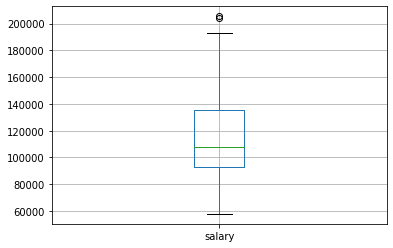

In [13]:
# Keempat, menghapus outlier dari data yang baru, dengan membuat visualisasi pencilan atau outlier dengan boxplot
# Disini saya hanya akan mengecek dan menghapus data outlier pada variabel kolom "salary"
# Pengecekan outlier terhadap semua kolom numeric
import matplotlib.pyplot as plt

def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(True)
  plt.show()

plot_boxplot(Salaries3, input())
# Text input dapat copy paste dari nama kolom (bertipe int/float) yang terdapat dalam Salaries3.info()

Dapat dilihat bahwa data memiliki outlier, maka akan kita hapus

In [14]:
Col = ['salary']

Q1 = Salaries3[Col].quantile(0.25)
Q3 = Salaries3[Col].quantile(0.75)
IQR = Q3 - Q1

Salaries3 = Salaries3[~((Salaries3[Col] < (Q1 - 1.5 * IQR)) |(Salaries3[Col] > (Q3 + 1.5 * IQR))).any(axis=1)]
Salaries3.shape

(196, 4)

Dapat dilihat bahwa jumlah observasi berkurang, yang menandakan bahwa outlier telah berhasil dihapus. 

**Note : untuk melihat kemabli apakah sudah benar terhapus, anda dapat run kembali code yang menginput kolom**


# **Dummy Regression**

In [15]:
Salaries3

,rank,yrs.service,sex,salary
1,AssocProf,8,Male,83000
2,Prof,16,Male,134550
3,Prof,14,Female,109954
4,Prof,3,Male,150480
5,AssocProf,28,Male,106300
...,...,...,...,...
196,Prof,25,Male,101738
197,Prof,38,Male,166024
198,AsstProf,2,Male,91300
199,AsstProf,3,Male,79750


Dapat dilihat bahwa untuk kolom 'sex' dan 'rank' berisikan berbgai macam kategori, maka akan kita uraikan untuk masing masing kategori berisikan angka 1/0

In [16]:
# Periksa tipe data Salaries3
Salaries3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 200
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         196 non-null    object
 1   yrs.service  196 non-null    int64 
 2   sex          196 non-null    object
 3   salary       196 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.7+ KB


In [17]:
# Kita notasikan sebagai berikut
Salaries3['Male'] = np.where(Salaries3['sex']=='Male', 1, 0)
Salaries3['Female'] = np.where(Salaries3['sex']=='Female', 1, 0)
Salaries3['Assocprof'] = np.where(Salaries3['rank']=='AssocProf', 1, 0)
Salaries3['Asstprof'] = np.where(Salaries3['rank']=='AsstProf', 1, 0)
Salaries3['Prof'] = np.where(Salaries3['rank']=='Prof', 1, 0)

In [18]:
Salaries3

,rank,yrs.service,sex,salary,Male,Female,Assocprof,Asstprof,Prof
1,AssocProf,8,Male,83000,1,0,1,0,0
2,Prof,16,Male,134550,1,0,0,0,1
3,Prof,14,Female,109954,0,1,0,0,1
4,Prof,3,Male,150480,1,0,0,0,1
5,AssocProf,28,Male,106300,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
196,Prof,25,Male,101738,1,0,0,0,1
197,Prof,38,Male,166024,1,0,0,0,1
198,AsstProf,2,Male,91300,1,0,0,1,0
199,AsstProf,3,Male,79750,1,0,0,1,0


Selanjutnya kita hapus kolom 'sex' dan 'rank' dikarenakan kita tidak membutuhkannya lagi

In [19]:
Columns = ['sex', 'rank']
Salaries3.drop(Columns,inplace=True, axis=1)

In [24]:
Salaries4 = Salaries3.reset_index(drop=True)
Salaries4.index = Salaries4.index + 1
Salaries4

,yrs.service,salary,Male,Female,Assocprof,Asstprof,Prof
1,8,83000,1,0,1,0,0
2,16,134550,1,0,0,0,1
3,14,109954,0,1,0,0,1
4,3,150480,1,0,0,0,1
5,28,106300,1,0,1,0,0
...,...,...,...,...,...,...,...
192,25,101738,1,0,0,0,1
193,38,166024,1,0,0,0,1
194,2,91300,1,0,0,1,0
195,3,79750,1,0,0,1,0


Selanjutnya kita membuat model persamaan regresinya

model_Maleprof0 = lm(data3$data2.salary ~ data3$d_Assocprof + data3$d_Asstprof + data3$data2.yrs.service + data3$d_Male)

In [25]:
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
# Persamaan regresi (Male = 1 & Prof = 0)
Reg1 = sm.OLS(Salaries4['salary'], sm.add_constant(Salaries4[['Assocprof', 'Asstprof', 'yrs.service', 'Male']])).fit()
print(Reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     27.42
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           5.40e-18
Time:                        10:03:25   Log-Likelihood:                -2238.8
No. Observations:                 196   AIC:                             4488.
Df Residuals:                     191   BIC:                             4504.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.274e+05   6272.149     20.319      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Didapatkan persamaan untuk Male = 1 dan Prof = 0 adalah :

*   **Y = 1.274e+05 - 3.196e+04(Assocprof) - 4.636e+04(Asstprof) - 201.0168(yrs.service) + 808.2617(Male)**






In [29]:
# Persamaan regresi (Female = 1 & Prof = 0)
Reg2 = sm.OLS(Salaries4['salary'], sm.add_constant(Salaries4[['Assocprof', 'Asstprof', 'yrs.service', 'Female']])).fit()
print(Reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     27.42
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           5.40e-18
Time:                        10:12:46   Log-Likelihood:                -2238.8
No. Observations:                 196   AIC:                             4488.
Df Residuals:                     191   BIC:                             4504.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.282e+05   3872.613     33.117      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Didapatkan persamaan untuk Female = 1 dan Prof = 0 adalah :

*   **Y = 1.282e+05 - 3.196e+04(Assocprof) - 4.636e+04(Asstprof) - 201.0168(yrs.service) - 808.2617(Female)**

# **Kesimpulan dan Saran**

**Kesimpulan**
*   Dapat disimpulkan bahwa Reg1 dan Reg2 memiliki nilai *R-squared* atau koefisien determinasi yang sama, yaitu sebesar 0.365 atau 36.5%. Yang menandakan bahwa model persamaan Reg1 dan Reg2 dapat menjelaskan keragaman dalam data sebesar 36.5%

**Saran**
*   Untuk meningkatkan *R-squared* atau kopefisien determinasi dari Reg1 dan Reg2, dapat dilakukannya transformasi data




